Author: Rahul Bhatia (rb3318)


# Question 1

## Part (A) Identify the conjugate prior and derive it's posterior for the model
Given model $$y_j | \theta \sim indep \; Poisson(n_j \theta) $$ 
we know $$\sum{y_j} | \theta \sim Poisson(\theta \sum{n_j})$$  
The conjugate prior is $$ \theta \sim Gamma(\alpha, \beta) $$  
and the posterior is $$ \theta | y \sim Gamma(\sum{y_j} + \alpha, J + \dfrac{\beta}{\sum{n_j}}) $$


## Part B: Find the MAP Estimator of $\theta$
if $\theta \sim Uniorm(0, 1)$ find the MAP Estimator  

given $\Pr(\theta) = 1, \theta \in [0,1]$, we know that $\Pr(n_j \theta) = \dfrac{1}{n_j}, n_j \theta \in [0, n_j]$  
Since the sum of independent Poissons is Poisson, then $\sum{y}$ is Poisson($\theta \sum_j{n_j}$)  
$$ Pr (\theta | y) \propto Pr(\sum_j{y_j} | \theta) * Pr(\theta) , 0 < \theta < 1 $$
Therefore the posterior $\theta|y_j$ effectively becomes a Gamma distribution, truncated such that $\theta \in [0, 1]$ with parameters $\alpha = \sum{y_j} + 1$ and $\beta = \sum{n_j}$  

Since the mode of a Gamma is $\dfrac{\alpha - 1}{\beta}$ we can say that the MAP estimator for $\theta$ is $\dfrac{\sum{y_j}}{\sum{n_j}}$

## Part C: Plot the posterior of $\theta$
J = 2, $n_1 = 40$, $n_2 = 100$, $y_1 = 12$, $y_2 = 25$
Thus, the posterior becomes a Truncated Gamma: 
$$ \theta | y \sim TruncGamma(\sum_j{y_j} + 1, \sum_j{n_j}) \theta \in [0, 1] $$
$$ \theta | y \sim TruncGamma(38, 140), \theta \in [0, 1] $$

Text(0.5, 1.0, 'Posterior Prob of $\\theta | y$, and MAP Estimate in Orange')

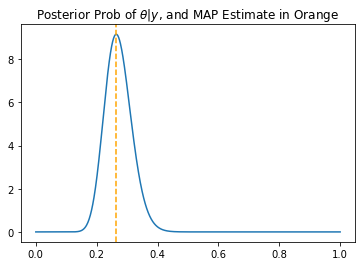

In [236]:
x = np.linspace(0, 1, 1000)
dist = stats.gamma(38, scale=1/140)
nrm = dist.cdf(1) - dist.cdf(0)
y = dist.pdf(x) / nrm
fig, ax = plt.subplots()
ax.plot(x, y)
ax.axvline(x=37 / 140, ymin=0, ymax=1, linestyle='--', color='orange', label='MAP Estimate')
ax.set_title("Posterior Prob of $\\theta | y$, and MAP Estimate in Orange")


## Part D: Use Bayesian CLT to approx posterior of $\theta$ under (c)
From Bayes CLT, we take the posterior distribution of $\theta$ to be a Normal, with mean $\hat{\theta}$ = posterior mode and variance $(n J(\hat{\theta}))^{-1}$
$$ J(\theta) = -E\left[ \dfrac{\partial^2 log p(y|\theta)}{\partial \theta^2} | \theta \right] $$
$$ = -E\left[ \dfrac{\partial^2}{\partial \theta^2} y log(\theta) - \theta - log y! \right] $$
$$ = -E \left[ - \dfrac{y}{\theta^2} \right] $$
$$ = \dfrac{y}{\theta_2} $$

In [240]:
from scipy import special
MAP = 37 / 140
def J(y, theta):
    return y / theta ** 2

Text(0.5, 1.0, 'Normal Approximation(BLUE)  vs Posterior(Orange)')

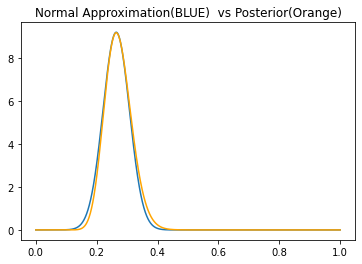

In [239]:
info = J(37, MAP)
dist = stats.norm(37 / 140, np.sqrt(1 / info))
x_norm = np.linspace(0, 1, 100000)
y_norm = dist.pdf(x_norm)
fig, ax = plt.subplots()
ax.plot(x_norm, y_norm)
ax.plot(x, y, color='orange')
ax.set_title("Normal Approximation(BLUE)  vs Posterior(Orange)")

# Question 2 Hierarchical Normal Model

## Part A

Since the draws $\sigma_i^2$ are indep, we can say
$$\sigma_i^2 | \sigma_0^2, \sigma_{-i}^2, y = \sigma_i^2 | \sigma_0^2, y $$
Since we are using the Normal model with known mean and variance with inverse chi squared prior, we already know this distribution from conjugacy
$$\sigma_i^2 | \sigma_0^2, y \sim Inv-\chi^2(\nu_0 + n, \dfrac{\nu_0 \sigma_0^2 + \sum_{i=1}^{n}{y_i}}{\nu_0 + n} )$$
which simplifies to the following when n = 1
$$\sigma_i^2 | \sigma_0^2, y \sim Inv-\chi^2(\nu_0 + 1, \dfrac{\nu_0 \sigma_0^2 + y_i}{\nu_0 + 1} )$$

For the second piece, we start with Bayes rule:  
$$ Pr(\theta_0^2 | \theta^2, y) \propto Pr(y | \theta^2, \theta_0^2) * Pr(\theta^2 | \theta_0^2) * Pr(\theta_0^2) $$
since only the second two components are functions of $\theta_0$ we can simplify to
$$ \propto Pr(\theta^2 | \theta_0) * Pr(\theta_0) $$
$$ \propto e^{-\sigma_0^2} \prod_{i=1}^{n}{\dfrac{(\dfrac{\nu_0}{2})^{\nu_0 / 2}}{\Gamma(\nu_0 / 2)} (\sigma_0^2)^{\nu_0/2} (\sigma_i^2)^{-\nu_0/2 + 1} e^{\dfrac{-\nu_0 \sigma_0^2}{2 \sigma_i^2}}} $$
$$ \propto (\sigma_0^2)^{n\nu_0/2} e^{\sigma_0^2 (1 + \dfrac{\nu_0}{2}\sum_{i=1}^{n}{1/\sigma_i^2}} $$
Which is a Gamma distribution, parameterized as follows:
$$ \sigma_0^2 | \sigma^2, y \sim Gamma(1 + \dfrac{\nu_0 n}{2}, 1 + \dfrac{\nu_0}{2}\sum_{i=1}^{n}{\dfrac{1}{\sigma_i^2}}) $$

## Part B

In [2]:
import numpy as np
import seaborn as sns

In [10]:
import scipy.stats as stats

In [43]:
def sample_scaled_inv_chi_2(df, scale):
    return((df * scale) / stats.chi2(df = df).rvs(1)[0])


def posterior_median_scaled_inv_chi_2(df, scale):
    return df * scale * 1 / (df * (1 - 2 / (9 * df)) ** 3)

In [11]:
nu_0 = 10
n = 10
y_i = np.arange(1, 11)

sigma_2_i_t = np.zeros((10, 1000))
sigma_0_2_t = np.zeros(1000)

sigma_0_2_t[0] = stats.gamma(1, 1).rvs(1)[0]

In [12]:
sigma_2_i_t[:, 2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
for t in range(1, 1000):
    sigma_0_2_t[t] = stats.gamma(1 + nu_0 / 2, scale=1 / (1 + nu_0 / 2 * np.sum(1 / sigma_2_i_t[:, t - 1]))).rvs(1)[0]
    for i in range(0, 10):
        sigma_i_t[i][t] = sample_scaled_inv_chi_2(nu_0 + 1, (nu_0 * sigma_0_2_t[t - 1] + y_i[i]) / (nu_0 + 1))

/Users/rahul/opt/miniconda3/envs/bayes/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [38]:
import matplotlib.pyplot as plt

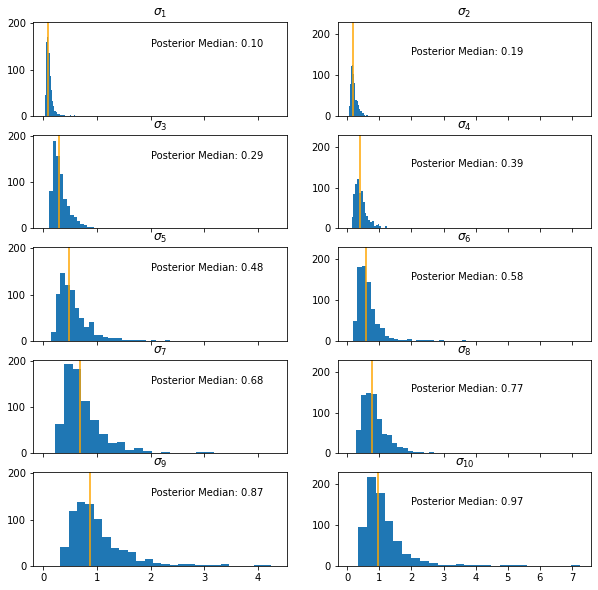

In [50]:
import pandas as pd
samples = pd.DataFrame(sigma_i_t.T)
fig, ax = plt.subplots(5, 2, figsize=(10, 10), sharex='col', sharey='col')
for i in range(10):
    ax_i = np.ravel(ax)[i]
    samples_for_sigma_i_2 = samples.iloc[250:][i]
    ax_i.hist(samples_for_sigma_i_2, bins=25)
    ax_i.set_title(f"$\sigma_{{{i+1}}} $")
    post_median = posterior_median_scaled_inv_chi_2(nu_0 + 1, (nu_0 * sigma_0_2_t[t - 1] + y_i[i]) / (nu_0 + 1))
    ax_i.axvline(x=post_median, ymin=0, ymax=1, color='orange')
    ax_i.annotate(f"Posterior Median: {post_median:.2f}", xy=(2, 150))

# Question 3

## Part A

In [51]:
quality = pd.DataFrame({
    "m_1": [83, 92, 92, 46, 67],
    "m_2": [117, 109, 114, 104, 87],
    "m_3": [101, 93, 92, 86, 67],
    "m_4": [105, 119, 116, 102, 116],
    "m_5": [79, 97, 103, 79, 92],
    "m_6": [57, 92, 104, 77, 100]
})

In [57]:
quality

m_1  m_2  m_3  m_4  m_5  m_6
0   83  117  101  105   79   57
1   92  109   93  119   97   92
2   92  114   92  116  103  104
3   46  104   86  102   79   77
4   67   87   67  116   92  100

In [124]:
J = 6
n = 5


def sample_theta_i(i, last_sample):
    mu = last_sample['mu']
    tau = last_sample['tau']
    sigma = last_sample['sigma']
    n_j = n
    y_j_bar = quality[f"m_{i}"].mean()
    mu_theta_i = (
        ( (mu / tau**2) + (n_j * y_j_bar / sigma ** 2) )
        / ( (1 / tau ** 2) + (n_j / sigma ** 2) )
    )
    var_theta_i = 1 / (1 / tau ** 2 + n_j / sigma ** 2)
    return stats.norm(mu_theta_i, var_theta_i).rvs(1)[0]


def sample_mu(last_sample):
    theta_j = [last_sample[f"theta_{i}"] for i in range(1, 7)]
    post_mu_hat = np.mean(theta_j)
    post_var_hat = last_sample['tau'] ** 2 / J
    return stats.norm(post_mu_hat, post_var_hat).rvs(1)[0]


def sample_sigma_2(last_sample):
    df = J * n
    scale = ((quality - quality.mean())**2).sum().sum() / (J * n)
    return df * scale / stats.chi2(df).rvs(1)[0]


def sample_tau_2(last_sample):
    mu = last_sample['mu']
    theta_j = [last_sample[f"theta_{i}"] for i in range(1, 7)]
    scale = np.var(theta_j, ddof=J-1)
    #scale = 1 / (J - 1) * np.sum([(theta - mu) ** 2 for theta in theta_j])
    df = J - 1
    return df * scale / stats.chi2(df).rvs(1)[0]


def gibbs_sampler(size=1000):
    init_thetas = {f"theta_{i}": quality[f"m_{i}"].mean() for i in range(1, 7)}
    init_mu = np.mean(list(init_thetas.values()))
    init_tau = np.std(list(init_thetas.values()))
    init_sigma = quality.std().mean()
    samples = [
        {
            "mu": init_mu,
            "sigma": init_sigma,
            "tau": init_tau,
            **init_thetas
        }
    ]
    for i in range(size):
        sample = {
            "mu": sample_mu(samples[-1]),
            "sigma": np.sqrt(sample_sigma_2(samples[-1])),
            "tau": np.sqrt(sample_tau_2(samples[-1])),
            **{f"theta_{i}": sample_theta_i(i, samples[-1]) for i in range(1, 7)}
        }
        samples.append(sample)
    return pd.DataFrame(samples)

In [137]:
samples = gibbs_sampler(2000)
qualifying_samples = samples.iloc[1000:]

In [139]:
qualifying_samples.quantile([0.025, 0.25, 0.5, 0.75, 0.975]).T

0.025       0.250       0.500       0.750        0.975
mu      -6419.490343 -605.765122   59.307158  719.908977  6696.069923
sigma      10.419850   11.863474   12.911124   14.122029    17.100130
tau        30.631201   56.553895   79.633355  118.301104   240.155057
theta_1   -13.670813   50.005815   73.757209   98.101558   164.584654
theta_2    15.188943   82.954396  107.256890  130.229478   199.561706
theta_3   -13.449747   62.930242   86.796202  112.085182   182.605812
theta_4    13.402880   86.201724  110.082108  135.520134   210.454892
theta_5    -3.128120   64.030004   90.382002  116.998595   184.791445
theta_6   -13.700736   60.048809   85.390774  110.316330   182.474602

## Part B

Text(490.3594587330067, 100, '470.36')

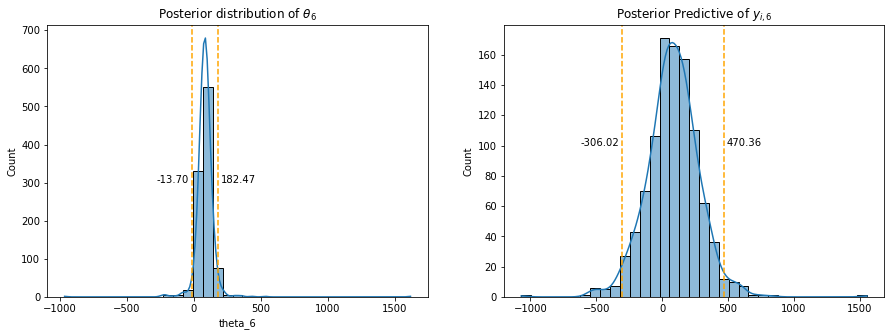

In [187]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


# Posterior
sns.histplot(qualifying_samples['theta_6'], kde=True, bins=35, ax=ax[0])
ax[0].set_title("Posterior distribution of $\\theta_6$")
lower, upper = qualifying_samples['theta_6'].quantile([0.025, 0.975])
ax[0].axvline(x=lower, ymin=0, ymax=1, color='orange', linestyle="--")
ax[0].annotate(f"{lower:.02f}", xy=(lower-20, 300), ha='right')
ax[0].axvline(x=upper, ymin=0, ymax=1, color='orange', linestyle="--")
ax[0].annotate(f"{upper:.02f}", xy=(upper+20, 300), ha='left')

# Posterior Predictive
ppd = pd.Series([stats.norm(loc=qsample['theta_6'], scale=qsample['sigma'] ** 2).rvs(1)[0]
                 for index, qsample in qualifying_samples.iterrows()])
sns.histplot(ppd, kde=True, bins=35, ax=ax[1])
ax[1].set_title("Posterior Predictive of $y_{{i,6}}$")
lower, upper = ppd.quantile([0.025, 0.975])
ax[1].axvline(x=lower, ymin=0, ymax=1, color='orange', linestyle="--")
ax[1].annotate(f"{lower:.02f}", xy=(lower-20, 100), ha='right')
ax[1].axvline(x=upper, ymin=0, ymax=1, color='orange', linestyle="--")
ax[1].annotate(f"{upper:.02f}", xy=(upper+20, 100), ha='left')


## Part C

Text(42890.92510099454, 100, '42870.93')

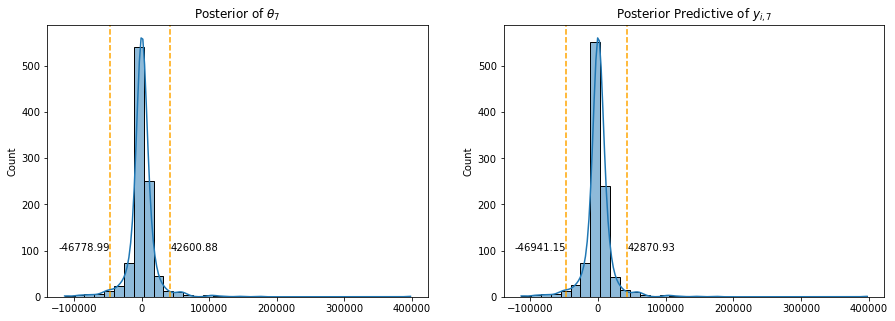

In [189]:
theta_7 = pd.Series([stats.norm(sample['mu'], sample['tau'] ** 2).rvs(1)[0] for index, sample in qualifying_samples.iterrows()])
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(theta_7, kde=True, bins=35, ax=ax[0])
ax[0].set_title("Posterior of $\\theta_7$")
lower, upper = theta_7.quantile([0.025, 0.975])
ax[0].axvline(x=lower, ymin=0, ymax=1, color='orange', linestyle="--")
ax[0].annotate(f"{lower:.02f}", xy=(lower-20, 100), ha='right')
ax[0].axvline(x=upper, ymin=0, ymax=1, color='orange', linestyle="--")
ax[0].annotate(f"{upper:.02f}", xy=(upper+20, 100), ha='left')


ppd = pd.Series([stats.norm(loc=theta, scale=sample['sigma'] ** 2).rvs(1)[0]
                 for (theta, (index, sample)) in zip(theta_7, qualifying_samples.iterrows())])
sns.histplot(ppd, kde=True, bins=35, ax=ax[1])
ax[1].set_title("Posterior Predictive of $y_{{i,7}}$")
lower, upper = ppd.quantile([0.025, 0.975])
ax[1].axvline(x=lower, ymin=0, ymax=1, color='orange', linestyle="--")
ax[1].annotate(f"{lower:.02f}", xy=(lower-20, 100), ha='right')
ax[1].axvline(x=upper, ymin=0, ymax=1, color='orange', linestyle="--")
ax[1].annotate(f"{upper:.02f}", xy=(upper+20, 100), ha='left')

# Question 4

In [179]:
players = pd.DataFrame([
    {"player": "Russell Westbrook", "makes": 64, "attempts": 75, "overall": 0.845},
    {"player": "James Harden", "makes": 72, "attempts": 95, "overall": 0.847},
    {"player": "Kawhi Leonard", "makes": 55, "attempts": 63, "overall": 0.88},
    {"player": "LeBron James", "makes": 27, "attempts": 39, "overall": 0.674},
    {"player": "Isaiah Thomas", "makes": 75, "attempts": 83, "overall": 0.909},
    {"player": "Stephen Curry", "makes": 24, "attempts": 26, "overall": 0.898},
    {"player": "Giannis Antetokounmpo", "makes": 28, "attempts": 41, "overall": 0.770},
    {"player": "John Wall", "makes": 66, "attempts": 82, "overall": 0.801},
    {"player": "Anthony Davis", "makes": 50, "attempts": 54, "overall": 0.802},
    {"player": "Kevin Durant", "makes": 13, "attempts": 16, "overall": 0.875},
])

In [180]:
players.head()

player  makes  attempts  overall
0  Russell Westbrook     64        75    0.845
1       James Harden     72        95    0.847
2      Kawhi Leonard     55        63    0.880
3       LeBron James     27        39    0.674
4      Isaiah Thomas     75        83    0.909

## Part A

The use of the beta and normal for the prior and hyperpriors respectively is reasonable for a few reasons:
- The use of a beta distribution appeals to the conjugacy of the beta and binomial distributions. This gives us a simple form for the posterior distribution
- The definition of $\eta$ serves as a random variable that represents the overall effect of being in a clutch siutation on performance for any player. For example, when $\eta$ is 0, the Beta distribution's parameters fall back to being the overall ratio for player $j$.
- This definition of a prior for $\eta$ has an expectation of 0, which implies that the prior expectation of the effect of being in a clutch situation is that it is the same as any other shooting scenario. 
- The variance of our hyper prior is quite high, leading to a very diffuse hyperprior. This makes it a relatively uninformative hyperprior, indicating not much prior knowledge about this variable. 

## Part B

### Show the full conditional posterior for $\theta_j$  

Since $\theta_j$ is conditionally independent of $\theta_{(-j)}$ given $\eta$, we write:  
$$ Pr(\theta_j | \theta_{(-j)}, \eta,  y_j) = Pr(\theta_j | \eta, y_j) $$
Expanding the right side, we get
$$ Pr(\theta_j | \eta, y_j) \propto Pr(y_j | \theta_j, \eta) * Pr(\theta_j | \eta) * Pr(\eta) $$
$$ \propto {n_j \choose y_j} (\theta_j)^{y_j} (1 - \theta_j)^{n_j - y_j} * \dfrac{\Gamma(e^\eta)}{\Gamma(e^\eta q_j) \Gamma(e^\eta (1 - q_j))} \theta_j^{e^\eta q_j -1} (1-\theta_j)^{e^\eta(1-q_j) - 1} * \dfrac{ e^{ -\dfrac{\eta^2}{2 * 5^2} } }{ 5 \sqrt{2\pi} }$$
If you remove the terms that don't depend on $\theta_j$, you find:
$$ \propto \theta_j^{e^\eta q_j - 1 + y_j} (1 - \theta_)^{e^\eta(1-q_j) - 1 + n_j - y_j} $$
Which has the form of a Beta distribution with the followign parameterization:
$$ \sim Beta(e^\eta q_j + y_j, e^\eta(1-q_j) + n_j - q_j) $$

### Show that the full conditional posterior for $\eta$

$$ Pr(\eta|\theta, y) \propto Pr(y | \theta, \eta) * Pr(\theta | \eta) * Pr(\eta) $$
Since $Pr(y | \theta, \eta) = Pr(y | \theta)$ does not depend on $\eta$ we can simplify to
$$ \propto Pr(\theta | \eta) * Pr(\eta) $$
$$ \propto N(\eta | 0, 5^2) * Pr(\theta | \eta) $$
Since the $\theta_j$ are all independently drawn, we can say that their joint probability is the product of their marginals. Expanding that yields:
$$ \propto N(\eta | 0, 5^2) * \prod_{j=1}^{J} Beta (\theta_j | e^\eta q_j, e^\eta(1 - q_j)) $$